In [1]:
# importing the necessary libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 

In [2]:
# ignoring the unecessary warnings 
import warnings
warnings.filterwarnings('ignore')

####  lets read the image test image in order to perform some actions 

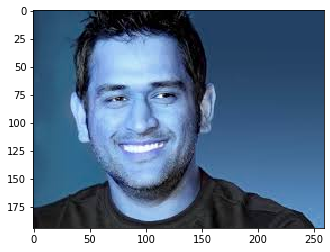

In [3]:
img = cv2.imread('test.jpg')
plt.imshow(img)

In [4]:
img.shape 

(194, 259, 3)

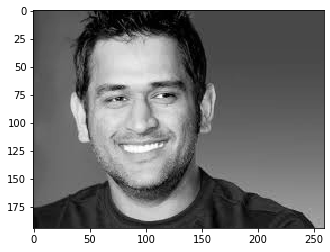

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

In [6]:
gray.shape 

(194, 259)

#### to classify the each image we need to detect the face 
#### after the face has been detetected , we need to check whether eyes are available or not ( because eye are important feature of a face )
#### we will detetect the face using , haar cascades 

In [7]:
# path of the xml files required
face_xml = r'C:\Users\abdul\Desktop\Haar Cascade github\haarcascade_frontalface_default.xml'
eye_xml = r'C:\Users\abdul\Desktop\Haar Cascade github\haarcascade_eye.xml'

In [8]:
# creating the cascades objects 
face_cascades = cv2.CascadeClassifier(face_xml)
eye_cascades = cv2.CascadeClassifier(eye_xml)

In [9]:
face_cascades

<CascadeClassifier 0AB572E0>

In [10]:
eye_cascades


<CascadeClassifier 0A4469D0>

In [11]:
# lets detect teh face 
face = face_cascades.detectMultiScale(gray)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

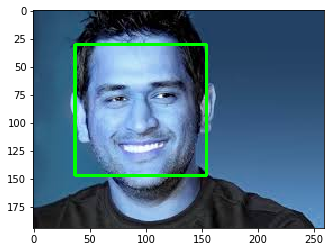

In [12]:
plt.imshow(img)

In [13]:
# lets detect the eyes 
# now for eyes we need to check for each faces

faces = face_cascades.detectMultiScale(gray, 1.3,10)
for face in faces:
    x, y, w, h = face 
    color_face = img[y:y+h, x:x+w]
    gray_face = gray[y:y+h, x:x+w]
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
    eyes = eye_cascades.detectMultiScale(gray_face)
    for ex, ey, ew, eh in eyes:
        cv2.rectangle(color_face, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2 )

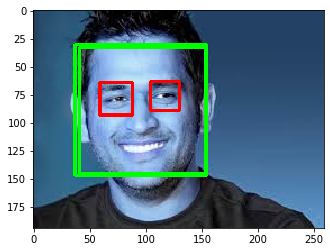

In [14]:
plt.imshow(img)

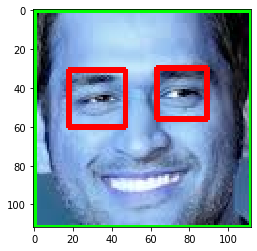

In [15]:
plt.imshow(color_face)

#### lets write a function that will return cropped face for an image  

In [16]:
def get_face(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascades.detectMultiScale(gray)
    result = []
    if faces is not None:
        for (x, y, w, h) in faces:
            gray_face = gray[y:y+h, x:x+w]
            color_face = img[y:y+h, x:x+w]
            eyes = eye_cascades.detectMultiScale(gray_face)
            if len(eyes) == 2:
                result.append(color_face)
    return result 

#### creating a new diretcory called as cropped and this cropped folder will have images for all the players faces 

In [17]:
import os 

In [18]:
dataset_path = r'C:\Users\abdul\Desktop\data analysis\ML projects\Image Classification\datasets'
img_dirs = []
for entry in os.scandir(dataset_path):
    if entry.is_dir():  # will check is it folder or not
        img_dirs.append(entry.path)

In [19]:
img_dirs

['C:\\Users\\abdul\\Desktop\\data analysis\\ML projects\\Image Classification\\datasets\\dhoni face images - Google Search',
 'C:\\Users\\abdul\\Desktop\\data analysis\\ML projects\\Image Classification\\datasets\\virat kohli face images - Google Search']

#### now we are going to create a cropped folder if it doesn't exist  

In [20]:
import shutil 

In [21]:
cropped_path = r'C:\Users\abdul\Desktop\data analysis\ML projects\Image Classification\datasets\cropped'

In [22]:
import shutil 
if os.path.exists(cropped_path):   # will check , if path exist 
    shutil.rmtree(cropped_path)   # if path already exist , it will remove all the content from that particular dir 
os.mkdir(cropped_path)

####  Now we are going to get the cropped face for each imaage and we will save them all in each celebrity folder  

In [23]:
cropped_img_dirs = []
celebrity_file_name_dict = {}

In [24]:
img_dirs 

['C:\\Users\\abdul\\Desktop\\data analysis\\ML projects\\Image Classification\\datasets\\dhoni face images - Google Search',
 'C:\\Users\\abdul\\Desktop\\data analysis\\ML projects\\Image Classification\\datasets\\virat kohli face images - Google Search']

In [25]:
for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')[-1].split(' ')[0]
    celebrity_file_name_dict[celebrity_name] = []
    count = 1
    for img in os.scandir(img_dir):
        if 'jpg' in img.path:
            faces = get_face(img.path)
            if faces is not None:
                for face in faces:
                    celebrity_folder = cropped_path + '\\' + celebrity_name
                    if not os.path.exists(celebrity_folder):
                        os.mkdir(celebrity_folder)
                        cropped_img_dirs.append(celebrity_folder)
                    saving_path = celebrity_folder + '\\' + str(count) + '.jpg'
                    cv2.imwrite(saving_path, face)
                    celebrity_file_name_dict[celebrity_name].append(saving_path)
                    count += 1

#### now we have removed so many images manually, so we need to update our celebrity_names_dict  

In [92]:
for celebrity, image_path_list in celebrity_file_name_dict.items():
    for img_path in image_path_list:
        if cv2.imread(img_path) is None:
            celebrity_file_name_dict[celebrity].remove(img_path)

# Feature Engineering 
#### we are going to use Wavelet Transform to extract the facial features from a face 

In [26]:
test_face = get_face('test.jpg')

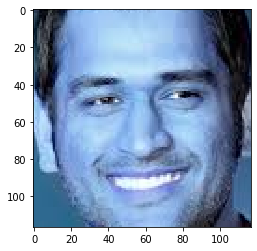

In [27]:
plt.imshow(test_face[0])

In [28]:
import pywt

In [29]:
def w2d(img, mode = 'haar', level = 1):
    array = img
    array = cv2.cvtColor(array, cv2.COLOR_BGR2GRAY)
    array = np.float32(array)
    array /= 255;
    coeffs = pywt.wavedec2(array, mode , level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    array_H = pywt.waverec2(coeffs_H, mode)
    array_H *= 255;
    array_H = np.uint8(array_H)
    
    return array_H 

In [30]:
featured_img = w2d(test_face[0], 'db1', 5)

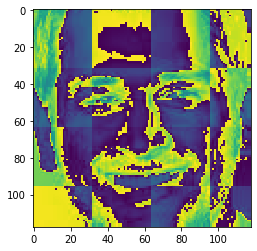

In [31]:
plt.imshow(featured_img)

#### now we will make our data sets , each featured image will be stacked vertically with featuresd image  

In [32]:
test_img = cv2.resize(test_face[0], (32, 32))
featured_img = cv2.resize(featured_img, (32, 32))

In [33]:
test_img.shape

(32, 32, 3)

In [34]:
featured_img.shape 

(32, 32)

In [35]:
combined = np.vstack((test_img.reshape(-1, 1), featured_img.reshape(-1, 1)))

#### we are going to create a function which will ccreate our X and y data set  

In [39]:
celebrity_file_name_dict.keys()

dict_keys(['dhoni', 'virat'])

In [41]:
# labeling the y value with some numbers 
class_dict = {}
count = 0
for celebrity_name, img_paths in celebrity_file_name_dict.items():
    class_dict[celebrity_name] = count 
    count += 1 

In [42]:
class_dict

{'dhoni': 0, 'virat': 1}

In [97]:
X, y = [], []  # training x and training y data set 
for celebrity, training_file_list in celebrity_file_name_dict.items():
    for training_img in training_file_list:
        img = cv2.imread(training_img)
        if img is None:
            continue 
        else:
            # scalling the image to the same dimension 
            scaled_raw_img = cv2.resize(img, (32, 32))
            
            # getting the wavelet transformed image and scaling to the same dimension 
            featured_img = w2d(img, 'db1', 5)
            scaled_featured_img = cv2.resize(featured_img, (32, 32))
            
            # vertical stacking of the images
            combined_img = np.vstack((scaled_raw_img.reshape(-1, 1), scaled_featured_img.reshape(-1, 1) ))

            # appedning the images and corresponding labels in the X and Y dataset 
            X.append(combined_img)
            y.append(class_dict[celebrity])

In [98]:
X[0]

array([[  6],
       [  8],
       [ 18],
       ...,
       [  8],
       [167],
       [ 58]], dtype=uint8)

In [99]:
# but we need to convert this in the form of data set array so that model can take it and perform actions 
X = np.array(X).reshape(len(X), -1).astype(float)

In [100]:
X

array([[  6.,   8.,  18., ...,   8., 167.,  58.],
       [222., 217., 219., ..., 234., 237.,   8.],
       [127., 126., 153., ..., 248.,   3.,   6.],
       ...,
       [ 28.,  33.,  34., ..., 193., 162.,  85.],
       [  2.,   4.,   4., ..., 103., 249.,   4.],
       [ 88., 104., 117., ..., 249., 254., 151.]])

# Model Training  

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [120]:
pipe = Pipeline([('scaler', StandardScaler()), 
                ('model', SVC(C = 20))])

In [121]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [122]:
pipe.score(X_test, y_test)

0.8333333333333334

In [128]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.50      1.00      0.67         2

    accuracy                           0.83        12
   macro avg       0.75      0.90      0.78        12
weighted avg       0.92      0.83      0.85        12

